<a href="https://colab.research.google.com/github/diegomarlop/Actiivities_IH/blob/main/FIFA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np
from scipy import stats
import statistics as stat
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import preprocessing
from scipy.spatial import transform
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [2]:
data = pd.read_csv('fifa21_training.csv')

In [3]:
data

,Unnamed: 0,ID,Name,Age,Nationality,Club,BP,Position,Team & Contract,Height,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA
0,1954,184383,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,"5'9""",...,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1,64
1,2225,188044,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan","6'0""",...,53+2,53+2,57+2,53+2,48+2,48+2,48+2,53+2,18+2,77
2,1959,184431,S. Giovinco,33,Italy,Al Hilal,CAM,CAM CF,Al Hilal 2019 ~ 2022,"5'4""",...,56+2,56+2,59+2,53+2,41+2,41+2,41+2,53+2,12+2,80
3,9815,233796,J. Evans,22,Wales,Swansea City,CDM,CDM CM,Swansea City 2016 ~ 2021,"5'10""",...,58+2,58+2,56+2,57+2,58+2,58+2,58+2,57+2,14+2,59
4,10074,234799,Y. Demoncy,23,France,US Orléans Loiret Football,CDM,CDM CM,US Orléans Loiret Football 2018 ~ 2021,"5'11""",...,64+2,64+2,64+2,63+2,61+2,61+2,61+2,63+2,15+2,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13695,11284,239074,S. Aw,21,Senegal,Gil Vicente FC,LB,LB,Gil Vicente FC 2020 ~ 2023,"5'8""",...,52+2,52+2,58+2,58+2,54+2,54+2,54+2,58+2,15+2,60
13696,11964,241223,S. Mogi,21,Japan,Cerezo Osaka,GK,GK,Cerezo Osaka 2017 ~ 2021,"6'5""",...,23+2,23+2,20+2,20+2,22+2,22+2,22+2,20+2,58+2,59
13697,5390,210930,Carles Gil,27,Spain,New England Revolution,RM,RM CAM CM,New England Revolution 2019 ~ 2024,"5'7""",...,60+2,60+2,62+2,57+2,47+2,47+2,47+2,57+2,18+2,76
13698,860,162993,J. Perch,34,England,Mansfield Town,CDM,CDM RB CM,Mansfield Town 2020 ~ 2021,"5'11""",...,62+1,62+1,60+2,60+2,63+0,63+0,63+0,60+2,14+2,63


In [4]:
# Eliminamos las columnas que creemos que no son necesarias para hacer la predcción 
data = data.drop(['Unnamed: 0', 'Name', 'Position', 'Team & Contract',  'Growth', 'Joined', 'Loan Date End', 'Release Clause', 'Contract', 'Total Stats', 'W/F', 'SM', 'IR','ST',
           'RS',	'LW',	'LF',	'CF',	'RF',	'RW',	'LAM',	'CAM',	'RAM',	'LM',	'LCM',	'CM',	'RCM',	'RM',	'LWB',	'LDM',	'CDM',	'RDM',	'RWB',	'LB',	'LCB'	,'CB',	'RCB',	'RB',	'GK'],axis=1)

In [5]:
#Estandarizmos los headers para tener un mejor control 
def clean_headers(x):
  for i in x.columns:
   x.columns = [i.lower().replace(' ','_')  for i in x.columns]
  return x 

In [6]:
data = clean_headers(data)

In [7]:
#Dividiremos el DataFrame en numpericos y categóricos
data_num=data.select_dtypes(include=np.number)
data_cat=data.select_dtypes(include=np.object)

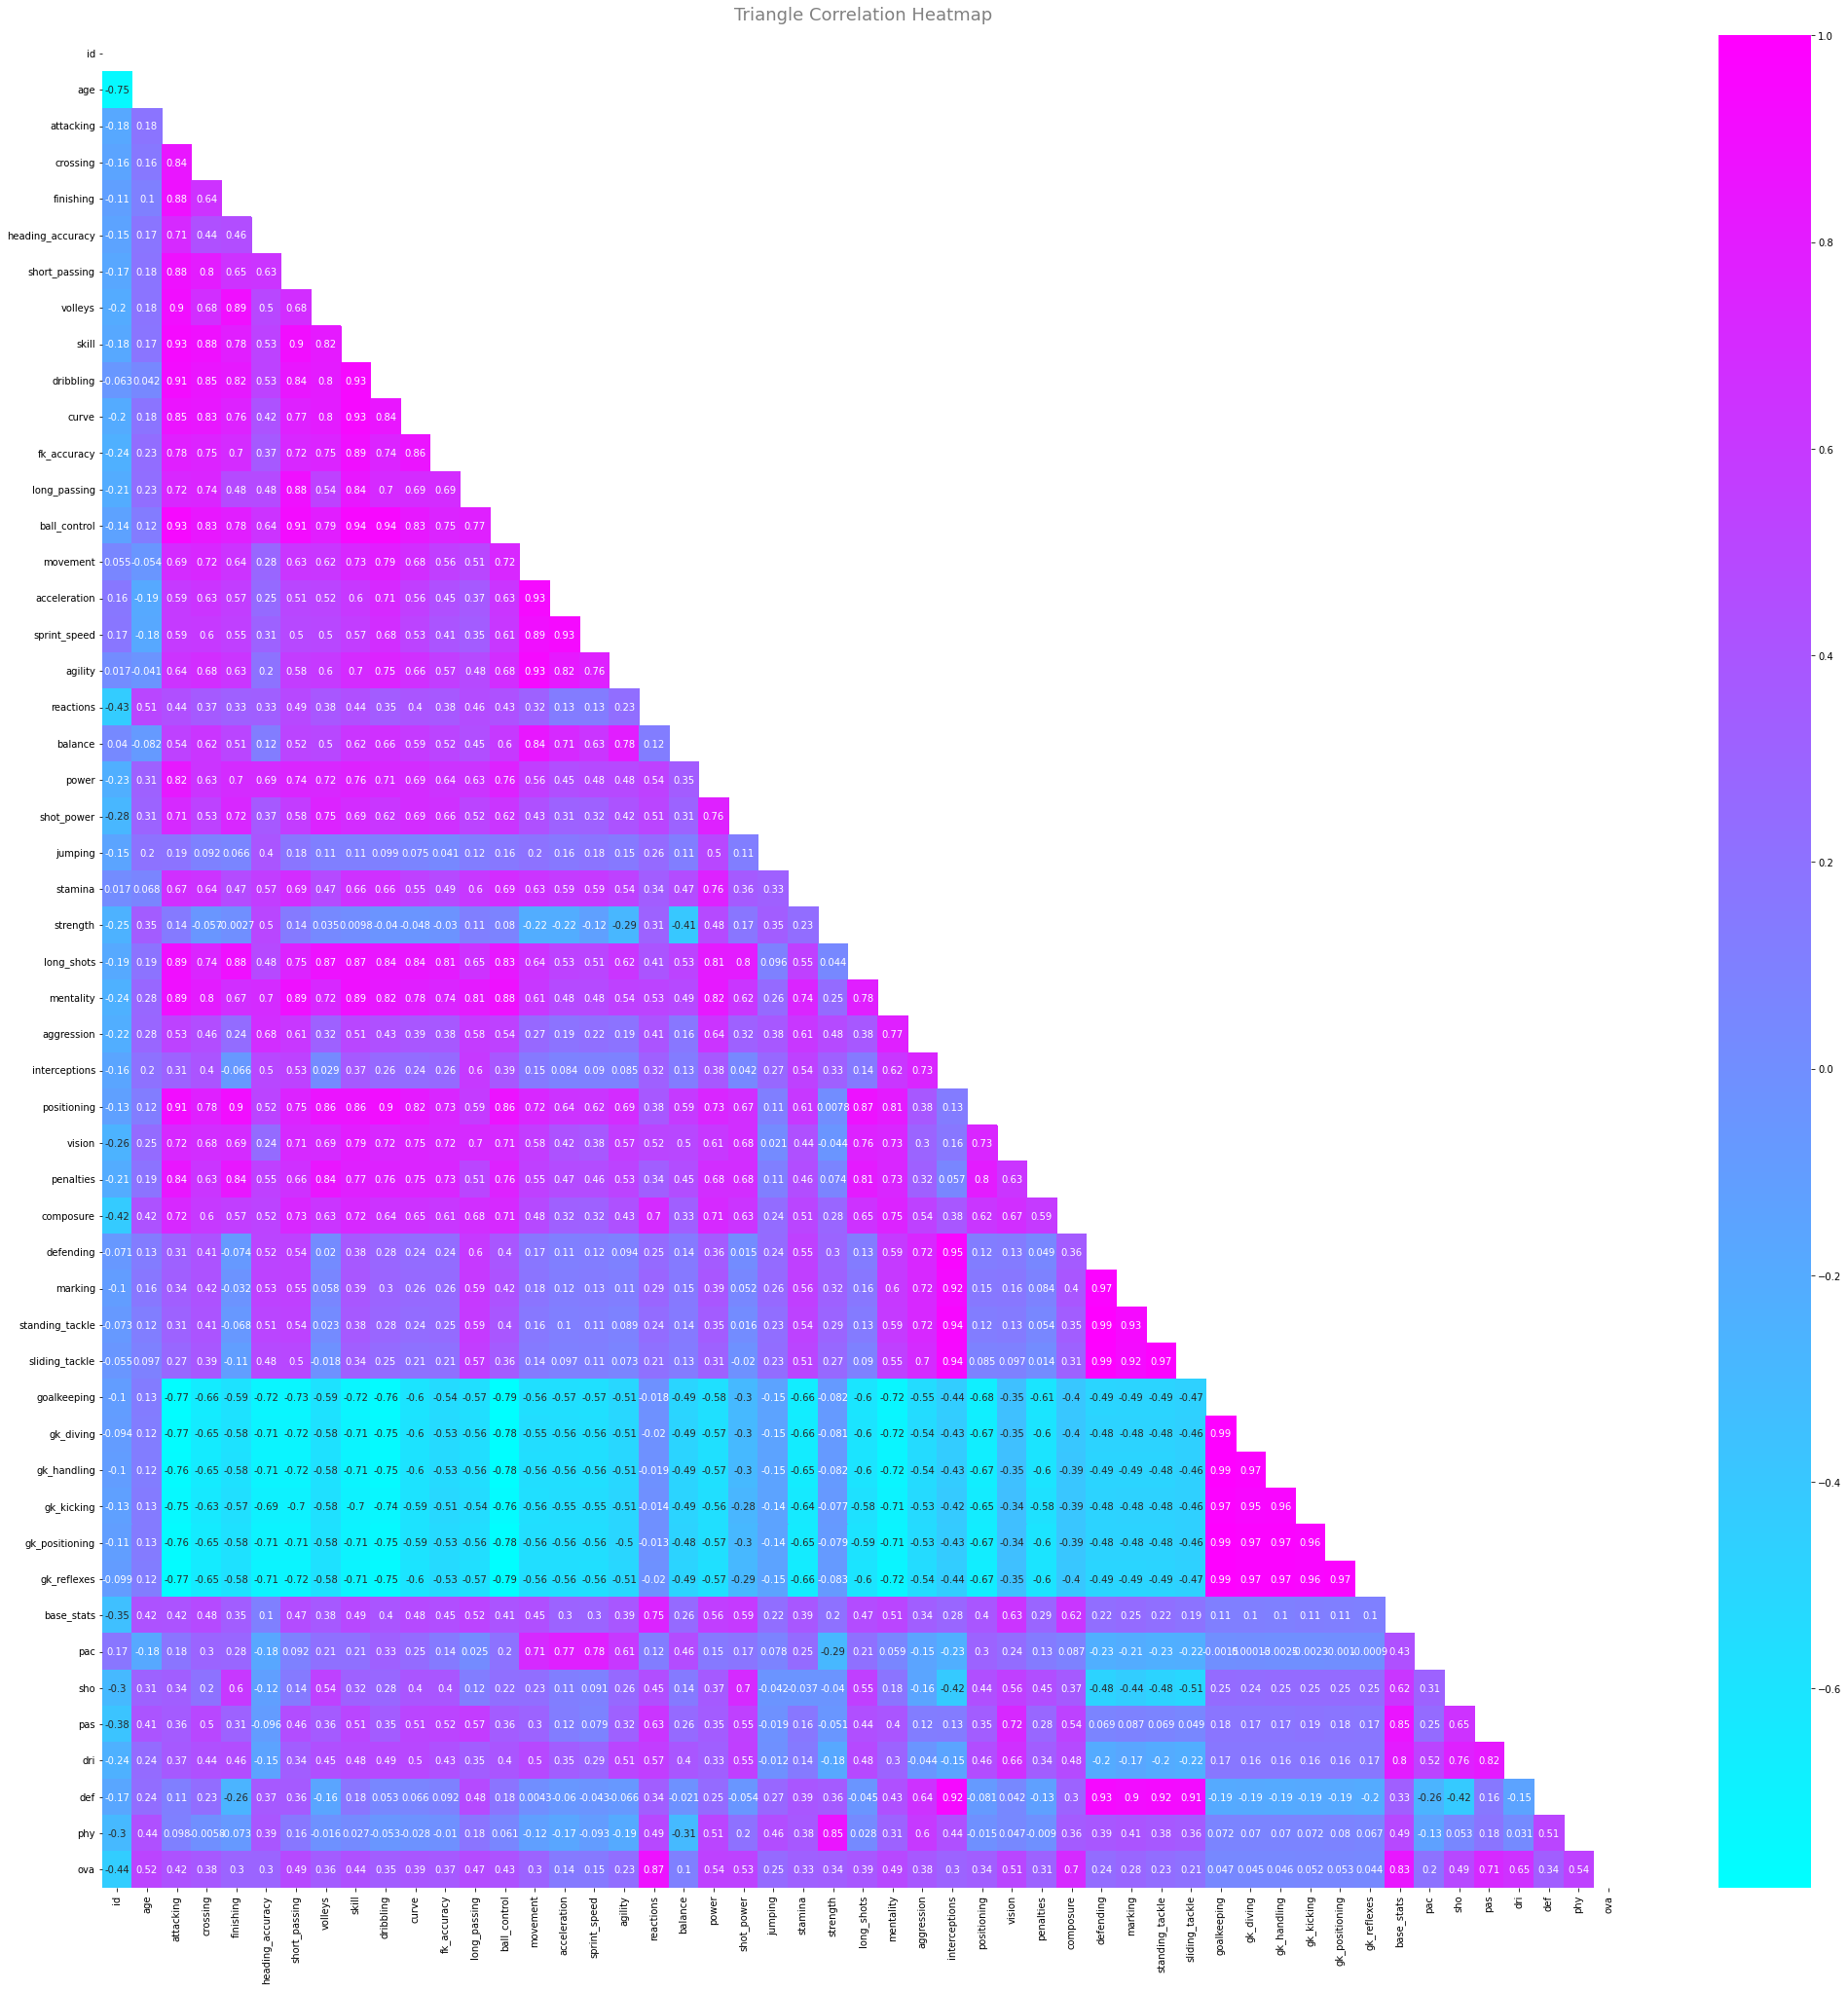

In [ ]:
plt.figure(figsize=(35,35))
mascara=np.triu(np.ones_like(data_num.corr(), dtype=np.bool)) # aislar el triángulo superior de una matriz mientras convierte todos los valores en el triángulo inferior en 
heatmap = sns.heatmap(data_num.corr(), mask=mascara, vmax=1, annot=True, cmap='cool') #podemos establecer el valor maximo y minimo
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16, color='grey');

In [8]:
#Analizamos y quitamos columnas con alta correlacion 
data_num = data[['age','skill','movement','power','goalkeeping','phy','def','dri','pas','pac','sho','ova']]

for i in data_num.corr().items():
  for k in i:
    if isinstance(k, pd.Series):
      for x in k:
        if (x >= .8) and (x!= 1):
          print("High variance ", x , " in", i[0], "&", k[k == x].index[0])

High variance  0.8202166778967825  in dri & pas
High variance  0.8202166778967825  in pas & dri


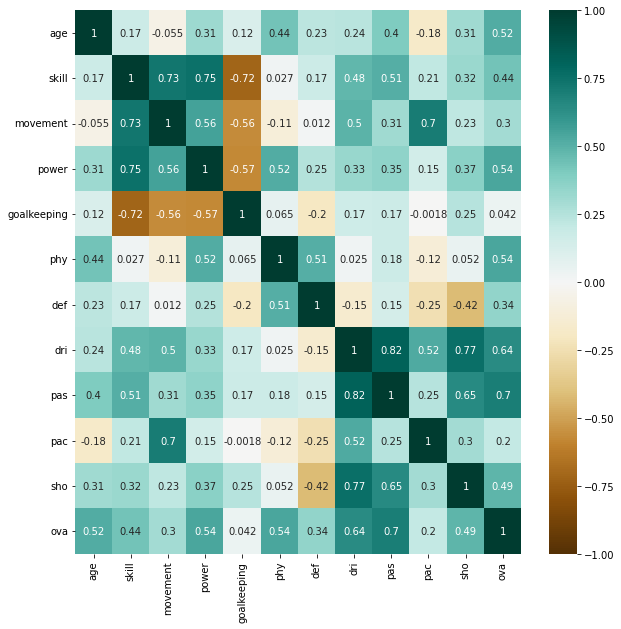

In [ ]:
fig, ax = plt.subplots(figsize=(10,10)  )
heatmap = sns.heatmap(data_num.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')

In [ ]:
#Checamos si hay nulos en la data numerica, si es asi hay que tratar con ellos 
data_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13700 entries, 0 to 13699
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   age          13700 non-null  int64
 1   skill        13700 non-null  int64
 2   movement     13700 non-null  int64
 3   power        13700 non-null  int64
 4   goalkeeping  13700 non-null  int64
 5   phy          13700 non-null  int64
 6   def          13700 non-null  int64
 7   dri          13700 non-null  int64
 8   pas          13700 non-null  int64
 9   pac          13700 non-null  int64
 10  sho          13700 non-null  int64
 11  ova          13700 non-null  int64
dtypes: int64(12)
memory usage: 1.3 MB


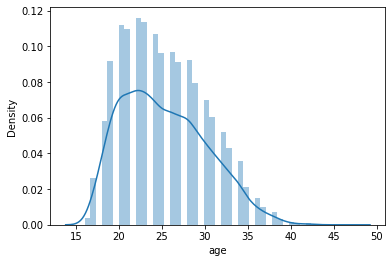

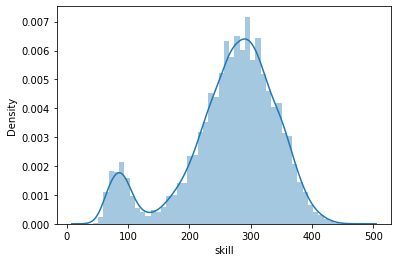

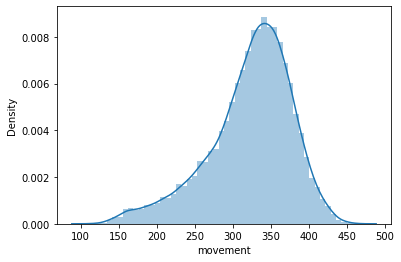

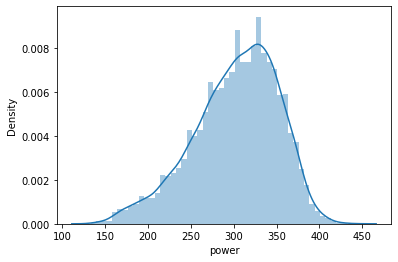

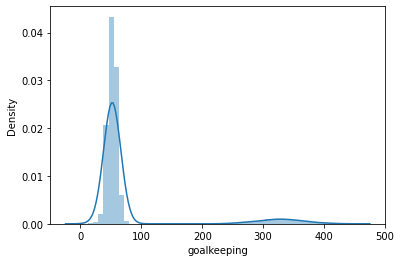

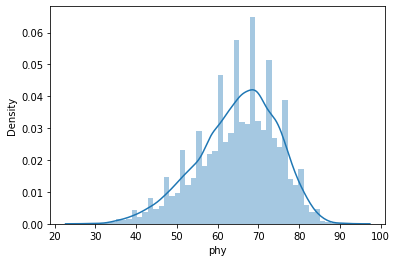

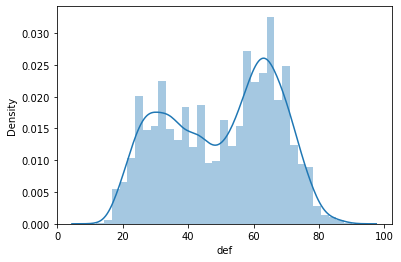

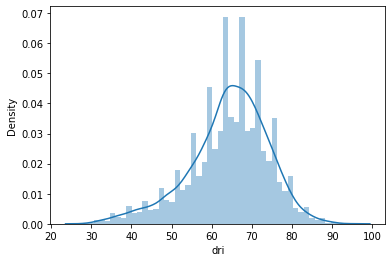

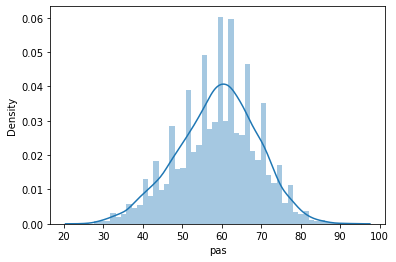

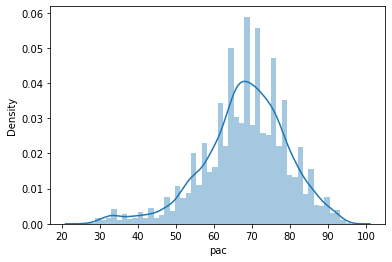

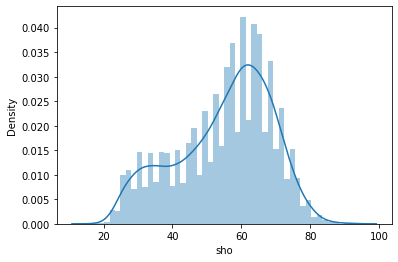

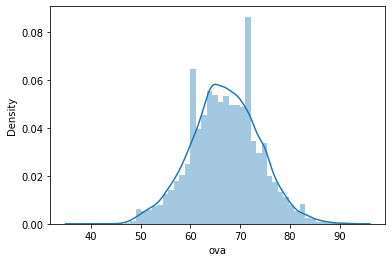

In [ ]:
#Checamos la distribució de cada columna numerica, para posteriormente aplicarle alguna transformacion aquella columna que su distrubucion tenga un sesgo muy grande 
for i in data_num: 
  sns.distplot(data_num[i])
  plt.show()

In [ ]:
data_num

,age,skill,movement,power,goalkeeping,phy,def,dri,pas,pac,sho,ova
0,26,286,346,306,48,60,51,63,63,69,51,64
1,30,375,404,372,55,71,33,82,68,83,75,77
2,33,424,424,308,21,56,27,86,78,80,77,80
3,22,259,282,277,42,60,57,57,54,57,44,59
4,23,280,324,280,52,66,60,64,60,66,44,65
...,...,...,...,...,...,...,...,...,...,...,...,...
13695,21,207,344,245,51,57,53,55,46,76,28,60
13696,21,70,192,177,288,54,30,62,57,60,55,59
13697,27,373,351,329,58,60,39,77,78,65,69,76
13698,34,261,288,300,43,69,61,58,58,53,47,63


In [9]:
#Logartimica
def log_transf_nan(x):
  x=np.log(x)
  if np.isfinite(x):
    return x 
  else:
    return np.NAN

In [10]:
sho_log=list(map(log_transf_nan,data_num['sho']))

In [11]:
data_num['sho_log']=sho_log
sho_log_sinan=data_num['sho_log'].fillna(np.mean(data_num['sho_log']))

In [ ]:
data_num

,age,skill,movement,power,goalkeeping,phy,def,dri,pas,pac,sho,ova,sho_log
0,26,286.0,346.0,306.0,48.0,60.0,51.0,63.0,63.0,69.0,51.0,64.0,3.931826
1,30,375.0,404.0,372.0,55.0,71.0,33.0,82.0,68.0,83.0,75.0,77.0,4.317488
2,33,424.0,424.0,308.0,21.0,56.0,27.0,86.0,78.0,80.0,77.0,80.0,4.343805
3,22,259.0,282.0,277.0,42.0,60.0,57.0,57.0,54.0,57.0,44.0,59.0,3.784190
4,23,280.0,324.0,280.0,52.0,66.0,60.0,64.0,60.0,66.0,44.0,65.0,3.784190
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8355,35,294.0,354.0,386.0,52.0,78.0,35.0,71.0,61.0,73.0,72.0,73.0,4.276666
8356,27,326.0,376.0,329.0,47.0,55.0,30.0,77.0,68.0,72.0,75.0,75.0,4.317488
8357,24,252.0,293.0,305.0,49.0,67.0,58.0,54.0,53.0,61.0,45.0,59.0,3.806662
8358,17,238.0,323.0,274.0,64.0,47.0,41.0,56.0,48.0,69.0,46.0,51.0,3.828641


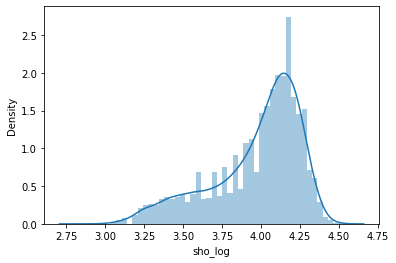

In [ ]:
sns.distplot(data_num['sho_log'])

In [12]:
def log_transf_nan(x):
  x=np.log(x)
  if np.isfinite(x):
    return x 
  else:
    return np.NAN

In [13]:
gk_log=list(map(log_transf_nan,data_num['goalkeeping']))

In [14]:
data_num['gk_log']=sho_log
gk_log_sinan=data_num['gk_log'].fillna(np.mean(data_num['gk_log']))

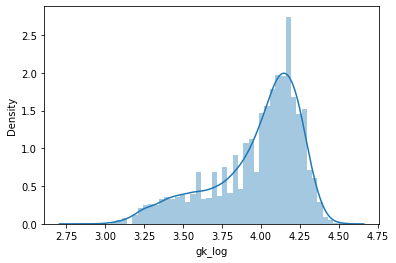

In [ ]:
sns.distplot(data_num['gk_log'])

In [15]:
data_num.drop(['goalkeeping','sho'],axis=1)

,age,skill,movement,power,phy,def,dri,pas,pac,ova,sho_log,gk_log
0,26,286,346,306,60,51,63,63,69,64,3.931826,3.931826
1,30,375,404,372,71,33,82,68,83,77,4.317488,4.317488
2,33,424,424,308,56,27,86,78,80,80,4.343805,4.343805
3,22,259,282,277,60,57,57,54,57,59,3.784190,3.784190
4,23,280,324,280,66,60,64,60,66,65,3.784190,3.784190
...,...,...,...,...,...,...,...,...,...,...,...,...
13695,21,207,344,245,57,53,55,46,76,60,3.332205,3.332205
13696,21,70,192,177,54,30,62,57,60,59,4.007333,4.007333
13697,27,373,351,329,60,39,77,78,65,76,4.234107,4.234107
13698,34,261,288,300,69,61,58,58,53,63,3.850148,3.850148


In [16]:
#Checar de los datos categoricos si existen nulos, en caso de haya, hay que lidiar con ellos 
data_cat.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13700 entries, 0 to 13699
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   nationality  13700 non-null  object
 1   club         13679 non-null  object
 2   bp           13700 non-null  object
 3   height       13700 non-null  object
 4   weight       13700 non-null  object
 5   foot         13700 non-null  object
 6   value        13700 non-null  object
 7   wage         13700 non-null  object
 8   a/w          13633 non-null  object
 9   d/w          13633 non-null  object
 10  hits         13700 non-null  object
 11  ls           13700 non-null  object
dtypes: object(12)
memory usage: 1.3+ MB


In [17]:
moda_club = stat.mode(data_cat['club'])
moda_aw = stat.mode(data_cat['a/w'])
moda_dw = stat.mode(data_cat['d/w'])

In [18]:
data_cat['club'] = data_cat['club'].fillna(moda_club)
data_cat['a/w'] = data_cat['a/w'].fillna(moda_aw)
data_cat['d/w'] = data_cat['d/w'].fillna(moda_dw)

In [19]:
data2 = pd.concat([data_cat,data_num],axis=1)

In [20]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13700 entries, 0 to 13699
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   nationality  13700 non-null  object 
 1   club         13700 non-null  object 
 2   bp           13700 non-null  object 
 3   height       13700 non-null  object 
 4   weight       13700 non-null  object 
 5   foot         13700 non-null  object 
 6   value        13700 non-null  object 
 7   wage         13700 non-null  object 
 8   a/w          13700 non-null  object 
 9   d/w          13700 non-null  object 
 10  hits         13700 non-null  object 
 11  ls           13700 non-null  object 
 12  age          13700 non-null  int64  
 13  skill        13700 non-null  int64  
 14  movement     13700 non-null  int64  
 15  power        13700 non-null  int64  
 16  goalkeeping  13700 non-null  int64  
 17  phy          13700 non-null  int64  
 18  def          13700 non-null  int64  
 19  dri 

In [21]:
#X-y split 
y=data2['ova']
x_x=data2.drop('ova',axis=1)

In [22]:
X_num= x_x.select_dtypes(include=np.number)
X_cat= x_x.select_dtypes(include=np.object)

In [23]:
#Normalizer
transformer=Normalizer().fit(X_num)
x_norm=transformer.transform(X_num)
x_norm

array([[0.04598638, 0.50585022, 0.61197264, ..., 0.09020406, 0.00695425,
        0.00695425],
       [0.04347464, 0.54343302, 0.5854585 , ..., 0.1086866 , 0.00625671,
        0.00625671],
       [0.04735314, 0.6084161 , 0.6084161 , ..., 0.11049066, 0.00623312,
        0.00623312],
       ...,
       [0.04264707, 0.58916131, 0.55441185, ..., 0.10898694, 0.00668786,
        0.00668786],
       [0.06613139, 0.50765564, 0.56017174, ..., 0.09141692, 0.00748869,
        0.00748869],
       [0.0337274 , 0.56212328, 0.61084063, ..., 0.10118219, 0.00747434,
        0.00747434]])

In [24]:
#Label
labels=preprocessing.OrdinalEncoder().fit(X_cat).transform(X_cat)
labels

array([[140., 314.,   4., ...,   2., 213., 130.],
       [ 28., 102.,  14., ...,   1., 314., 225.],
       [ 74.,  42.,   0., ...,   2., 422., 207.],
       ...,
       [137., 550.,  11., ...,   2.,  62., 173.],
       [ 45., 515.,   2., ...,   2., 291., 120.],
       [ 55., 677.,   0., ...,   2., 345., 127.]])

In [25]:
X=np.concatenate((x_norm,labels),axis=1)

In [26]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)

In [27]:
#Haciendo el modelo lineal, con una regresión
lm=linear_model.LinearRegression()

#Aquí ya ajustamos la maquinaria rpevia
model=lm.fit(X_train,y_train)

In [28]:
predictions=lm.predict(X_train)

In [29]:
r2_score(y_train,predictions)

0.8423953228245763